In [271]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [272]:
np.random.seed(0)
df=pd.read_csv(r'C:\Users\kedia\Documents\Quantitative Trading\SBIN-EQ.csv',parse_dates=True)
df.columns=["Date","O","H","L","C"]
df=df.iloc[::-1]
df.reset_index(inplace=True)
df.set_index("Date",inplace=True)
df.drop(columns="index",inplace=True)
df=df[:375]

In [273]:
r=df["C"]
r=r.reset_index()
r=r["C"]
t=r.diff()[1:].reset_index()["C"]
s=pd.concat([r,t],axis=1)
s.columns=["S","ds"]
dt=1/(60*24*365)

In [274]:
y=[]
x1=[]
x2=[]
# s.iloc[0].values
for i in range(len(s)-1):
    y.append(s.iloc[i].values[1]/s.iloc[i].values[0])
    x1.append(dt)
    x2.append(np.random.normal()*(dt**0.5))

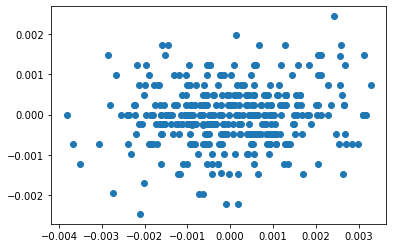

In [295]:
plt.scatter(x2,y)
# Therefore no good correlation

In [290]:
x1=np.reshape(x1,(-1,1))
x2=np.reshape(x2,(-1,1))
x=np.concatenate((x1,x2),axis=1)
model = LinearRegression().fit(x,y)
model.score(x,y)

0.012349460340969842

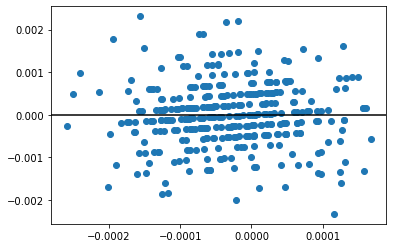

In [292]:
plt.scatter(model.predict(x),model.predict(x)-y)
plt.axhline(0,color='k')

# Conclusion

No good correlation. mu and sigma are not constant so are assumption turns out to be wrong here, also delta t is not almost 0. Model could be improved by using seconds data